# 1. Early EDA and Cleaning

## 1.1 Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('1.tripadvisor_scraped_hotel_reviews.csv')

## 1.2 Checking for Nulls

In [3]:
df.head(10)

,hotel_name,review_summary,review_p1,review_p2,score
0,Hotel Hilton London Gatwick Airport,Awful...,Its hard to find words that can describe this ...,"its just all a bit 'run down' Poor food, not...","<span class=""ui_bubble_rating bubble_10""></span>"
1,Hotel Hilton London Gatwick Airport,Great start to hokidat,Staying in a hotel that’s part of the airport ...,NaN,"<span class=""ui_bubble_rating bubble_50""></span>"
2,Hotel Hilton London Gatwick Airport,A good overnight stay!,My wife and I stayed at this hotel for one nig...,flat-screen TV (with a huge selection of TV c...,"<span class=""ui_bubble_rating bubble_50""></span>"
3,Hotel Hilton London Gatwick Airport,Satisfactory one night stay,One night stay which turned out to be much be...,so higher prices are expected. Overall a very...,"<span class=""ui_bubble_rating bubble_40""></span>"
4,Hotel Hilton London Gatwick Airport,"Still nice but looking a bit sad, old and dated",We had an executive room and even these are st...,NaN,"<span class=""ui_bubble_rating bubble_40""></span>"
5,Hotel Hilton London Gatwick Airport,NaN,NaN,NaN,NaN
6,Hotel Hilton London Gatwick Airport,NaN,NaN,NaN,NaN
7,Hotel Hilton London Gatwick Airport,NaN,NaN,NaN,NaN
8,Hotel Hilton London Gatwick Airport,NaN,NaN,NaN,NaN
9,Hotel Hilton London Gatwick Airport,NaN,NaN,NaN,NaN


In [4]:
df.shape

(35078, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35078 entries, 0 to 35077
Data columns (total 5 columns):
hotel_name        35078 non-null object
review_summary    17538 non-null object
review_p1         17538 non-null object
review_p2         4698 non-null object
score             17538 non-null object
dtypes: object(5)
memory usage: 1.3+ MB


In [6]:
df.dropna(subset=['review_p1'],axis=0,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17538 entries, 0 to 35072
Data columns (total 5 columns):
hotel_name        17538 non-null object
review_summary    17538 non-null object
review_p1         17538 non-null object
review_p2         4698 non-null object
score             17538 non-null object
dtypes: object(5)
memory usage: 822.1+ KB


## 1.3 Converting Score Column

In [8]:
df['score'] = df['score'].astype(str).apply(lambda x: x[37]).astype(int)

In [9]:
df.reset_index(inplace=True,drop=True)

In [10]:
df.head(10)

,hotel_name,review_summary,review_p1,review_p2,score
0,Hotel Hilton London Gatwick Airport,Awful...,Its hard to find words that can describe this ...,"its just all a bit 'run down' Poor food, not...",1
1,Hotel Hilton London Gatwick Airport,Great start to hokidat,Staying in a hotel that’s part of the airport ...,NaN,5
2,Hotel Hilton London Gatwick Airport,A good overnight stay!,My wife and I stayed at this hotel for one nig...,flat-screen TV (with a huge selection of TV c...,5
3,Hotel Hilton London Gatwick Airport,Satisfactory one night stay,One night stay which turned out to be much be...,so higher prices are expected. Overall a very...,4
4,Hotel Hilton London Gatwick Airport,"Still nice but looking a bit sad, old and dated",We had an executive room and even these are st...,NaN,4
5,Hilton London Metropole,Great stay,Hilton metropole is centrally located and prov...,NaN,4
6,Hilton London Metropole,Classic Hilton,1 Thanks for the quick suite upgrade! Love it!...,NaN,5
7,Hilton London Metropole,Terrible,"Absolutely terrible. Cracked ceiling, tiny roo...",NaN,1
8,Hilton London Metropole,Hilton,Me and my sister stayed at the Hilton metropol...,went through my finger to my elbow. Also when...,2
9,Hilton London Metropole,Clean and tidy. Nice rooms,We stayed here for a weekend away and used it ...,NaN,5


### 1.3.1 Histogram of Scores for Each Hotel

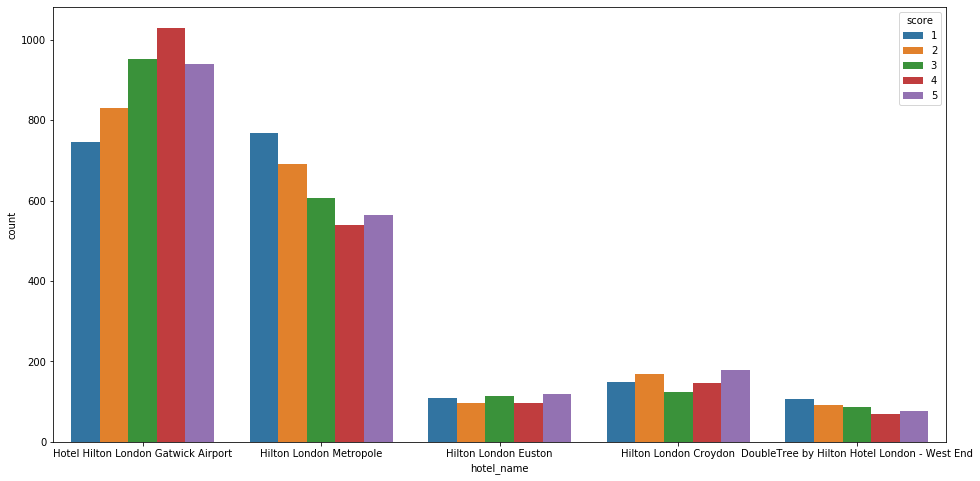

In [36]:
plt.figure(figsize=(16,8))
sns.countplot(x='hotel_name', hue='score',data= df)
plt.show()

### 1.3.2 Histogram of Scores for All Hotels

In [12]:
scores = pd.DataFrame(df.groupby('score').size().sort_values(ascending=False)).reset_index()

In [13]:
scores.rename(columns={0:'count'},inplace=True)

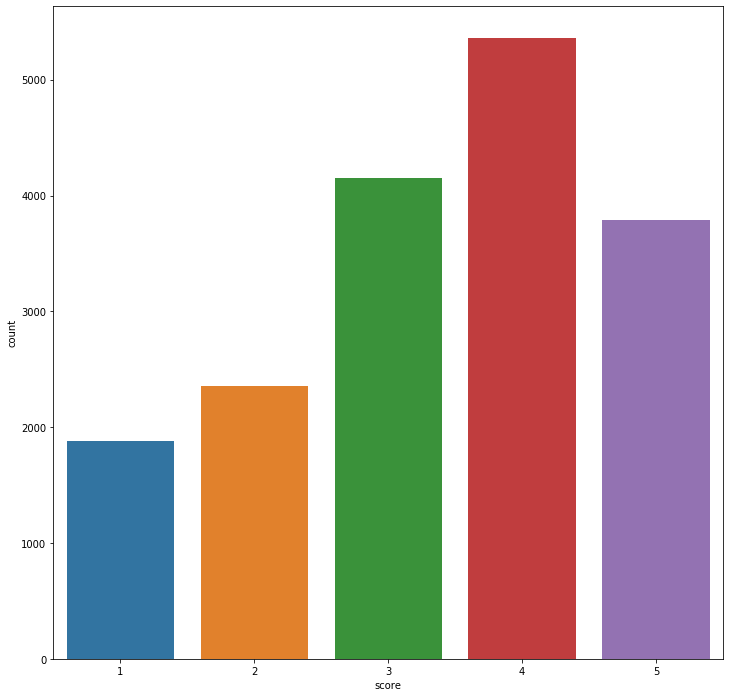

In [14]:
plt.figure(figsize=(12,12))
sns.barplot(x='score',y='count',data=scores)
plt.show()

## 1.4 Adjusting Class Imbalance for Scores

In [15]:
minority_class_len = len(df[df['score'] == 1])
minority_class_len

1881

In [16]:
score_1_class_indices = df[df['score'] == 1].index
score_2_class_indices = df[df['score'] == 2].index
score_3_class_indices = df[df['score'] == 3].index
score_4_class_indices = df[df['score'] == 4].index
score_5_class_indices = df[df['score'] == 5].index

In [17]:
random_score_2_class_indices = np.random.choice(score_2_class_indices,minority_class_len,replace=False)
print(len(random_score_2_class_indices))
random_score_3_class_indices = np.random.choice(score_3_class_indices,minority_class_len,replace=False)
print(len(random_score_3_class_indices))
random_score_4_class_indices = np.random.choice(score_4_class_indices,minority_class_len,replace=False)
print(len(random_score_4_class_indices))
random_score_5_class_indices = np.random.choice(score_5_class_indices,minority_class_len,replace=False)
print(len(random_score_5_class_indices))

1881
1881
1881
1881


In [18]:
under_sample_indices = np.concatenate([score_1_class_indices,random_score_2_class_indices,random_score_3_class_indices,random_score_4_class_indices,random_score_5_class_indices])

In [19]:
df = df.loc[under_sample_indices]

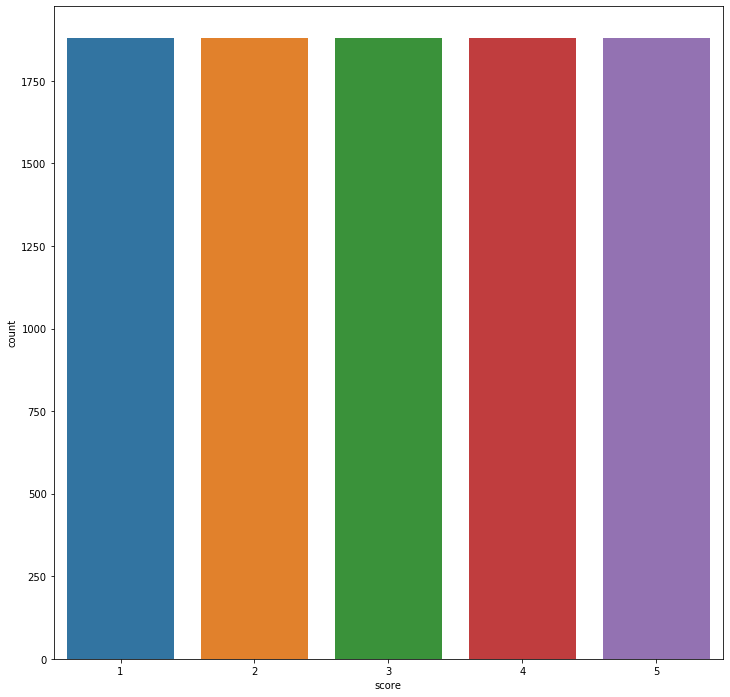

In [20]:
plt.figure(figsize=(12,12))
sns.countplot(x='score',data=df)
plt.show()

## 1.5 Joining Review Part 1 with Review Part 2 in New Column Review

In [21]:
df['review_p2'].fillna(value='',inplace=True)

In [22]:
df['review'] = df['review_p1'].astype(str) + df['review_p2'].astype(str)

In [23]:
df.head(10)

,hotel_name,review_summary,review_p1,review_p2,score,review
0,Hotel Hilton London Gatwick Airport,Awful...,Its hard to find words that can describe this ...,"its just all a bit 'run down' Poor food, not...",1,Its hard to find words that can describe this ...
7,Hilton London Metropole,Terrible,"Absolutely terrible. Cracked ceiling, tiny roo...",,1,"Absolutely terrible. Cracked ceiling, tiny roo..."
38,Hilton London Euston,Double deposit taken from bank,Very disappointed firstly i checked in online ...,,1,Very disappointed firstly i checked in online ...
40,Hilton London Metropole,Super disappointed!,First of all we arrived wanting to park at the...,…,1,First of all we arrived wanting to park at the...
43,Hilton London Metropole,Dissatisfied Hilton gold number,"Hello, I currently staying @ Hilton Metropole...",…,1,"Hello, I currently staying @ Hilton Metropole..."
48,Hotel Hilton London Gatwick Airport,Wouldn’t refund even though a government ban o...,1. Hotel gave option to pay on arrival which ...,,1,1. Hotel gave option to pay on arrival which ...
57,Hilton London Euston,"Stay away, you can’t trust them",Whether the prices are available on the bar or...,,1,Whether the prices are available on the bar or...
59,Hilton London Euston,Only sty here if nothing else is available in ...,The staff did not seem to be engaged or intere...,,1,The staff did not seem to be engaged or intere...
67,Hilton London Metropole,Rude staff,Restaurant staff were extremely rude. They did...,,1,Restaurant staff were extremely rude. They did...
78,Hilton London Croydon,Just plain awful staff attitude !!!!,"Stayed here with work for one night , what a m...",…,1,"Stayed here with work for one night , what a m..."


In [24]:
df['review'][0]

"Its hard to find words that can describe this experience without being too dismissive so i'll keep it short.  Pros. - Check experience was fine.... The checkin clerk was funny and helpful, and had a lovely manner with the guests. Very efficient. - Location... Very well set for access to Gatwick airport, with a short walk to the terminal for your flights.  Cons - Food...  the hotel not only was packed full and the restaurants were full, but the food itself was incredibly poor and expensive.   We did the buffet... on the evening.... barely anything was truly good tasting..... AVOID - Comfort... Hiltons of late seem to be less and less comfortable, the rooms stark... and without any character. Not the cleanest of rooms either. - its a big hotel.... everywhere is a lengthy walk and its just all a bit 'run down'  Poor food, not the best night sleep, expensive for what it is, tired and in need of significant change.  AVOID!"

## 1.6 Removing Review Part 1 and Review Part 2 Columns

In [25]:
df.drop(columns=['review_p1','review_p2'],inplace=True)

In [26]:
df.head()

,hotel_name,review_summary,score,review
0,Hotel Hilton London Gatwick Airport,Awful...,1,Its hard to find words that can describe this ...
7,Hilton London Metropole,Terrible,1,"Absolutely terrible. Cracked ceiling, tiny roo..."
38,Hilton London Euston,Double deposit taken from bank,1,Very disappointed firstly i checked in online ...
40,Hilton London Metropole,Super disappointed!,1,First of all we arrived wanting to park at the...
43,Hilton London Metropole,Dissatisfied Hilton gold number,1,"Hello, I currently staying @ Hilton Metropole..."


In [27]:
df.shape

(9405, 4)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9405 entries, 0 to 3807
Data columns (total 4 columns):
hotel_name        9405 non-null object
review_summary    9405 non-null object
score             9405 non-null int32
review            9405 non-null object
dtypes: int32(1), object(3)
memory usage: 650.6+ KB


In [29]:
df.describe()

,score
count,9405.000000
mean,3.000000
std,1.414289
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


## 1.7 Saving Structured Dataset as a CSV

In [30]:
df.to_csv('2.hotel_reviews_structured.csv',index=False)